In [16]:
def findtotalerror(m,c,x_data,y_data):
    y_pred=[m * x + c for x in x_data]
    errorsquared=[(y_data[i] - y_pred[i]) **2 for i in range(len(y_data))]
    return (sum(errorsquared))

def findleasterror(m_values,c_values,x_data,y_data):
    # print("Calculating best error for:",m_array,c_array)
    leasterror = float('inf')
    result=None
    for m in m_values:
        for c in c_values:
            totalerror = findtotalerror(m,c,x_data,y_data)
            if (totalerror < leasterror):
                leasterror = totalerror
                result = (totalerror,m,c)
    # print("Returning best error as:",result)
    return result

def findnextvalues(resultval,leftval,rightval, direction):
    if (resultval == leftval):
        if (direction==-1):
            leftval, rightval = 2 * leftval - rightval, leftval
        else:
            rightval = (leftval + rightval)/2
    else:
        if (direction==-1):
            leftval = (leftval + rightval)/2
        else:
            leftval, rightval = rightval, 2*rightval - leftval
    return (leftval, rightval)
    
    
def findbestprediction(x_datapoints, y_datapoints,num_iterations):
    leftm=-100
    rightm=100
    leftc=-100
    rightc=100
    bestresult=None
    change = .000001
    c_count = 0
    m_count = 0
    
    for i in range(num_iterations):
         
        bestresult = findleasterror([leftm,rightm],[leftc,rightc],x_datapoints,y_datapoints)
        error,m,c = bestresult
       
        l_m= m - change
        r_m= m + change
        result = findleasterror([l_m,r_m],[c],x_datapoints,y_datapoints)
        m_direction = -1 if result[1] == l_m  else 1
        if (m_direction == -1):
            m_count+=1
        
        l_c= c - change
        r_c= c + change
        result = findleasterror([m],[l_c,r_c],x_datapoints,y_datapoints)
        c_direction = -1 if result[2] == l_c  else 1

        if (c_direction == -1):
            c_count+=1
       

        leftm, rightm = findnextvalues(m,leftm,rightm, m_direction)
        leftc, rightc = findnextvalues(c,leftc,rightc, c_direction)

        if (abs(rightm - leftm) < change  and abs(rightc - leftc) < change ):
            break
        # print(f"leftm:{leftm}, rightm:{rightm}, leftc:{leftc}, rightc:{rightc}")
                
        # print(f"{i+1}.Result after this iteration:{bestresult}")
    print(m_count,c_count)
    return bestresult

In [17]:
# x= [1, 2, 3]
# y= [2, 3, 5]
x= [10, 11, 12,9]
y= [13, 14, 19,8]
num_iterations = 10000

r = findbestprediction(x,y,num_iterations)
print(f"Result with {num_iterations} iterations : {r}")

12 9986
Result with 10000 iterations : (38.9876364952579, 0.7246494293212891, 5.896949768066406)


---------------------------Gradient Descent---------------------------------------------------------------------

In [4]:
def diff_param(fn, param_idx,*args):
    delta = 0.000000000001
    r1=fn(*args)
    args=list(args)
    args[param_idx]+=delta
    r2=fn(*args)
    diff = (r2-r1)/delta
    return diff

def error(m,c,X,Y):
    Y_pred=m*X + c
    e = (Y - Y_pred)**2
    return np.sum(e)

In [21]:
def fit(X,Y,num_iterations):
    m = 100
    c = 0
    lr = 0.001 
    ms = []
    cs = []
    errors = []
    weights=np.array([m,c])
    for i in range(num_iterations):
        args = [m, c, X, Y]
        new_error = error(m, c, X, Y)
        ms.append(m)
        cs.append(c)
        weights=np.array([m,c])
        errors.append(new_error)
        de_dm = diff_param(error, 0, *args)
        de_dc = diff_param(error, 1, *args)
        m -=  lr * de_dm
        c -= lr * de_dc
        
    print(f"Last Error: {new_error} with weights: {weights}")
    result = [weights,errors]
    return result

Last Error: 130.85494918159165 with weights: [0.12292983 6.83940016]
Result with 1000 iterations : [0.12292983 6.83940016]
Test result error:22.57323998122602


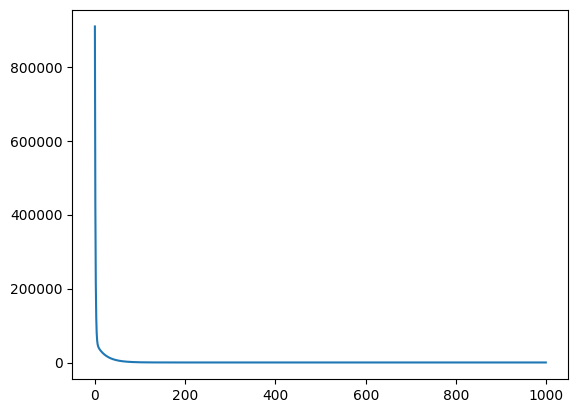

In [22]:
import numpy as np
from matplotlib import pyplot as plt
x=2*np.random.random((100, 1))
y = 5 + 2 * X + .4*np.random.randn(100, 1)
split_index = int(len(x) * 0.8)
x_train, x_test = np.split(x, [split_index])
y_train, y_test = np.split(y, [split_index])
num_iterations = 1000
r = fit(x_train,y_train,num_iterations)
print(f"Result with {num_iterations} iterations : {r[0]}")
errors=r[1]
m=r[0][0]
c=r[0][1]

new_error = error(m, c, x_test, y_test)
print (f"Test result error:{new_error}")

plt.plot(errors)


